
# Text-to-Image Generation using stable diffusion and diffusers




In [2]:
# diffusion model is an LLM that could be found in hugging face
!pip install diffusers transformers accelerate

  Using cached diffusers-0.32.2-py3-none-any.whl.metadata (18 kB)
  Using cached accelerate-1.4.0-py3-none-any.whl.metadata (19 kB)
  Using cached torch-2.6.0-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stability/stable-diffusion-x1-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16,use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = """ a 21 year old girl , with dark green sweather , light tone , brown shiny eyes , brow dark curly unstraightned hair , thin chin
 , working on a laptop , with earbuds , thinks about swimming """

In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[Prompt]:   a 21 year old girl , with dark green sweather , light tone , brown shiny eyes , brow dark curly unstraightned hair , thin chin 
 , working on a laptop , with earbuds , thinks about swimming 


(-0.5, 639.5, 639.5, -0.5)

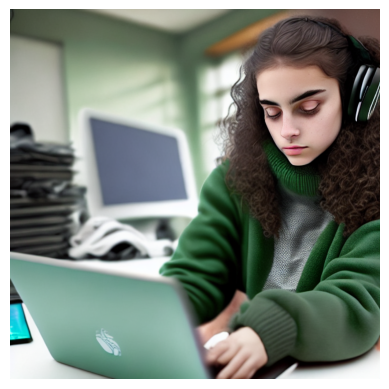

In [ ]:
print("[Prompt]: ",prompt)
plt.imshow(image)
plt.axis("off")


In [ ]:
prompt2 =""" a castle in a magical wood , the castle walls are made with candies and ice cream  """

  0%|          | 0/50 [00:00<?, ?it/s]

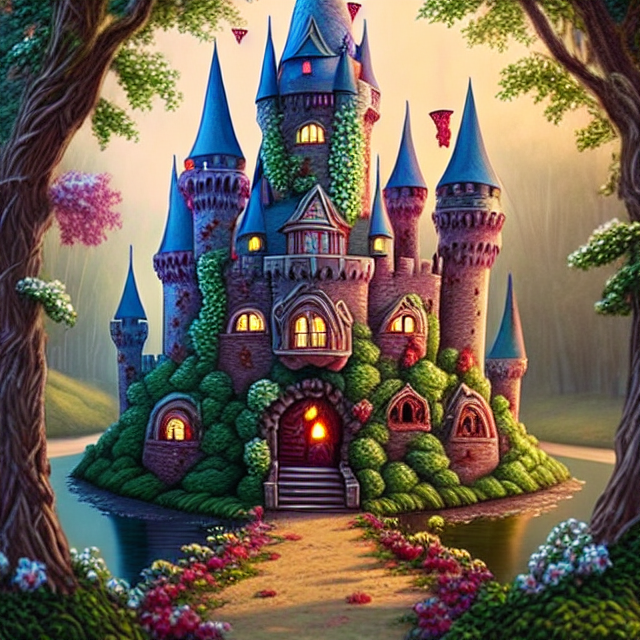

In [ ]:
image2 = pipe(prompt2).images[0]
image2


(-0.5, 639.5, 639.5, -0.5)

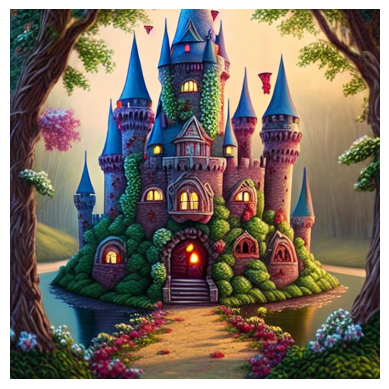

In [ ]:
plt.imshow(image2)
plt.axis("off")

# Different Parameters to test
- Negative prompting
- num_inference_steps
- height
- width
- num_images_per_prompt

In [ ]:
# for that let's create a function that takes on parameters
def generate_image(pipe,prompt,params):
  img = pipe(prompt, **params).images
  num_images = len(img)
  if(num_images > 1):
    fig,ax = plt.subplots(nrows = 1,ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis("off")
  else :
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis("off")
  plt.tight_layout()


In [ ]:
prompt3 ="""A breathtaking cyberpunk city at night, neon lights reflecting on wet streets, futuristic flying cars in the sky, a lone figure in a
 high-tech trench coat standing on a rooftop, rain softly falling, cinematic lighting, ultra-detailed, 4K resolution, photorealistic, concept art style. """
params ={}

  0%|          | 0/50 [00:00<?, ?it/s]

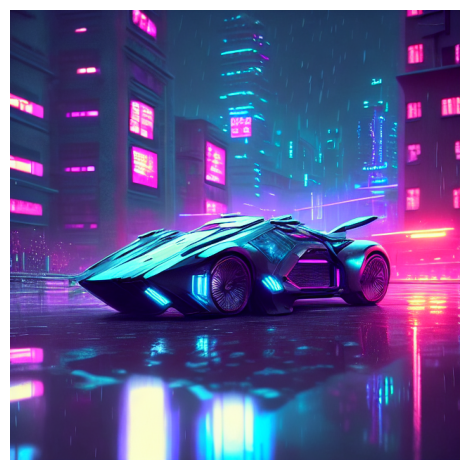

In [ ]:
generate_image(pipe,prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

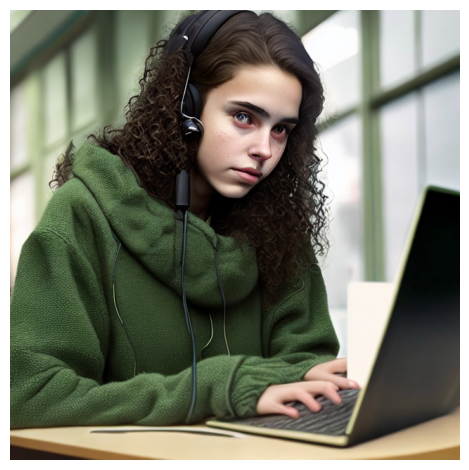

In [ ]:
# testing num_inference_steps
generate_image(pipe , prompt,params = {"num_inference_steps" : 100})

  0%|          | 0/50 [00:00<?, ?it/s]

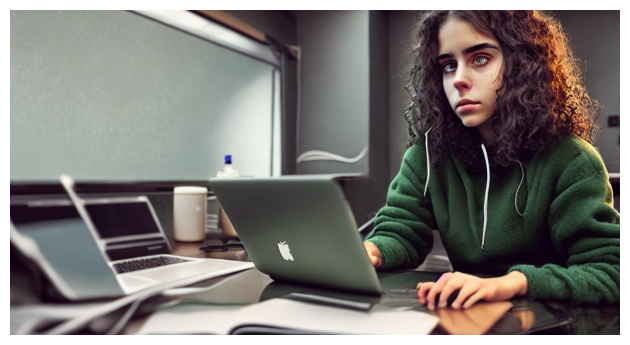

In [ ]:
# now let's add height and width too
params = {'num_inference_steps' : 50 , 'height' : 512 , 'width' : int(1.5*640)}
generate_image(pipe,prompt,params)

  0%|          | 0/30 [00:00<?, ?it/s]

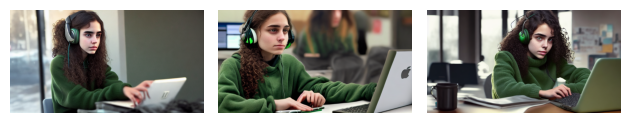

In [ ]:
# now let's add height and width too
params = {'num_inference_steps' : 30 , 'height' : 512 , 'width' : int(1.5*640) , 'num_images_per_prompt':3}
generate_image(pipe,prompt,params)

  0%|          | 0/30 [00:00<?, ?it/s]

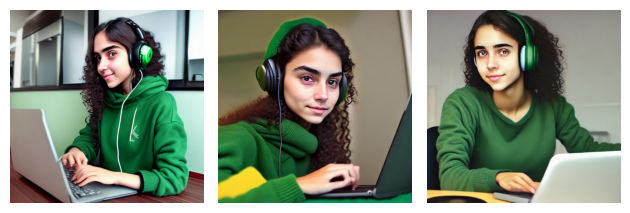

In [ ]:
#let's add some negative prompt
params = {'num_inference_steps' : 30 , 'num_images_per_prompt':3 , 'negative_prompt':'destroyed, devastated'}
generate_image(pipe,prompt,params)
